# Hi! Welcome to radio map simulator. 

The following notebook is a radio map simulator. (Similar to what we did on google sheets). It can create rectangular radio maps of different sizes, and implement. I believe that python is a better platform to implemet than excel. 



Completed Tasks :

1.   Create Visual Map that is dynamic. It can change according to the dimensions entered by the user
2. KNN (Easy version)

What needs to be Done


1.   Fix colouring of the heatmap. Coz it looks bad rite now
2.   Training Algorithms :
            - Neural Network
            - Maximum Likelihood Method
            - Random Forest
            - KNN complicated version
3.   Function which optimizes the best positions of the fingerprint points, APs, according to the size of the radio map and other features.





# **Grid module**

To run our algorithms, we need a radio map in a python data structure. Since we will be testing many algorithms and different kinds of radiomaps, manually hardcoding a grid of points each time will be very hard. Therefore, the following cell contains a class called : `radio_map`. You can create a radio map simply by creating an object.
For eg. `get_me_a_map = radio_map(x,y)` 
This will create a radio map of horizontal length x and vertical length y.




### Properties in radio_map class


1.   `.height`   : returns an int with the vertical length of the radio map
2.   `.width`   :  returns an int with the horizontal length of the radio map
3.   `.APs`     : returns a list of AP coordinates on the radio map
4.   `.FPC`     : returns a list of Fingerprint coordinates on the radio map
5.   `.QP`      : returns coordinates of the Query Point 
6.   `.radio_map` : returns a list of lists which stores the framework of the grid map


### Methods in radio_map class

1. `.gridDrawer()`   : prints the raw data of the radio_map in numbers as lists(No inputs required)
2. `.printBinaryMaze()`  : prints the grid with the placeholders as coloured emojis (No inputs required)
3. `.showVisualMap()` : prints a heatmap of the grid. This is more suitable for visual representation as compared to the above methods (No inputs required)
4. `.setAP()`  : to enter records of APs on the radio map. Inpute requires a list of coordinates of WifiAccess Points . For eg. [[1,2], [2,4], [3,4]]
4. `.setFingerprint` : to enter coordinates of fingerprints on the radio map. Input requires a list of coordinates of Fingerprint points. 
5. `.setQuery` : to enter the coordinates of the query point on the radio map. Input requires coordinates of the Query Point.






In [ ]:
# legend
    #empty squares have value = 0
    #borders have value = 8
    #APs have value = 3
    #Fingerprints have value = 1
    #Query point has a value = 2



import matplotlib.pyplot as plt
from seaborn import heatmap

class radio_map:
    
    def __init__(self,x_len, y_len):
        self.height = y_len                    # Property(height) == > the vertical length of the radio_map
        self.width = x_len                     # Property(width) ==> the horizontal length of the radio_map
        self.APs = []                          # Property(APs) ==> contains lists of coordinates of AP points. Updated using .setAPs() method
        self.FPC = []                          # Property(FPV) ==> contains lists of coordinates of FingerPrint Coordinates. Updated using .setFingerprint() method
        self.QP = []                           # Property(QP) ==> contains coordinates of the Query Point. Updated using .setQuery() method
        self.PP = []
        self.actualNearestNeighbours = []
        self.predictedNearestNeighbours = []
                                               
        #create radio_map
        self.radio_map = []                    # Property(radio_map) == > list of lists, stores the xy values of the radio_map
        radio_map = []  
    
#framework : x_len * y_len sized list of listse
        for i in range(y_len):
            temp = []
            for i in range(x_len):
                temp.append(0)
            radio_map.append(temp)
            
#differentiation of borders with cell values (borders have value 8)
        #horizontal borders ---->
        for i in range(x_len):
            radio_map[0][i] = 8
            radio_map[y_len-1][i] = 8

        #vertical borders ----->
        for element in radio_map:
            element[0] = 8
            element[x_len-1] = 8
        self.radio_map = radio_map

        
        
# method 1 : print the grid in simple format
    def gridDrawer(grid):
        for i in grid.radio_map:
            print(' ', i,'\n')
# method 2 : print the grid in emojis for basic visualization in case heatmap or seaborn doesn't work

    def printBinaryMaze(mazeGrid):
        x = mazeGrid.width
        y = mazeGrid.height

        for element in mazeGrid.radio_map:
            for i in element:
                if(i==0):
                    print("📗", end = " ")
                elif(i==8):
                    print("📕", end = " ")
                elif(i==1):
                    print("📔", end = " ")
                elif(i==2):
                    print("📙", end = " ")
                elif(i==3):
                    print("📘", end = " ")
                else:
                    print('E')
            print('\n')

            
# method 3 : print the heatmap of the mazeGrid
    def showVisualMap(mazeGrid):
        temp = []
        
        for i in range(mazeGrid.height):
            ls = []
            for j in range(mazeGrid.width):
                ls.append(mazeGrid.radio_map[i][j])
            temp.append(ls)    
            
        
        width = mazeGrid.width
        height = mazeGrid.height
        
        for i in range(height):
            for j in range(width):
                if temp[i][j]==8:       #border
                    temp[i][j] = 0
                elif temp[i][j]==0:     #empty
                    temp[i][j] = 50
                elif temp[i][j]==3:     #APs
                    temp[i][j] = 100
                elif temp[i][j]==1:     #fingerprint
                    temp[i][j] = 150
                elif temp[i][j]==2:
                    temp[i][j]= 250
                elif temp[i][j]==5:
                    temp[i][j]= 100
                    
        f = plt.figure(figsize = (width,height))
        heatmap(temp, vmin = 0, vmax = 255, cmap = "Set2", cbar = False, linewidths = 1, linecolor = 'black')
  



# method 4 : input : a list of coordinates for AP . For eg. [ [3,3], [4,4] , [5,5]  ]
#            function : updates the radio map and makes the radio map 
    def setAP(mazeGrid, AP_list ):   #list of APs
        for i in AP_list:  # is [x,y]
            x_coor = i[0]
            y_coor = i[1]
            mazeGrid.radio_map[y_coor][x_coor] = 3
            mazeGrid.APs.append(i)

        return mazeGrid.APs
            
            
# method 4 : input : a list of coordinates for fingerprint points . For eg. [ [3,3], [4,4] , [5,5]  ]             
    def setFingerprint(mazeGrid, FP_list):
        for i in FP_list:  # is [x,y]
            x_coor = i[0]
            y_coor = i[1]
            mazeGrid.radio_map[y_coor][x_coor] = 1
            mazeGrid.FPC.append(i)
        return mazeGrid.FPC
        
            
            
# method 5 : input :  a list containing just one coordinate . For eg. [6, 9]
#          
    def setQuery(mazeGrid, i):
        x_coor = i[0]
        y_coor = i[1]
        mazeGrid.radio_map[y_coor][x_coor] = 2
        mazeGrid.QP = i

        return mazeGrid.QP
        

# method 6 : input a : a list containing ust one coordinate. For eg. [4,2]
    def setPredicted(mazeGrid, i):
        x_coor = i[0]
        y_coor = i[1]
        mazeGrid.radio_map[y_coor][x_coor] = 5
        mazeGrid.PP = i

        return mazeGrid.PP

        
    
            
            
            
        

In [ ]:
# Example Usage :

x = radio_map(12, 9)
x.setFingerprint([[4,7], [10,6], [1,1], [7,8]])
x.setAP([[0,3], [0, 7], [11, 0], [3,8]])
x.setQuery([4,5])
x.showVisualMap()

# Simulation Functions

We don't have the time and energy to manually allot coordinates for **Query Point**, **Access Points** , **Fingerprint coordinates**. Therefore, the following cell contains functions that can randomly generate points for you. 

## List of functions:

1. `generateRandomFPs(map_knn, n)` : generates random *n* fingerprint coordinates on the *map_knn* radio map
2. `generateRandomAPs(map_knn, n)` : generates random n accesspoint coordinates on the  *map_knn* radio map
3. `generateRandomQP(map_knn)` : generates a random Query Point on the *map_knn* radio map
4. `createRandomScenario(map_knn, nAP, nFP)`: instead of calling the above functions individually. This function calls all the functions above and can generate a random scenario. 



In [ ]:
# Implementing A Random Scenario

import pandas as pd
import numpy as np
import random


def generateRandomFPs(n, map_knn):                        # Done
  FPS = []
  width = map_knn.width
  height = map_knn.height
  for i in range(n):
    temp = []
    x = random.randint(1, width-2)
    y = random.randint(1, height-2)
    while([x,y] in FPS):                           # Do while loop to avoid repetitions
      x = random.randint(1, width-2)
      y = random.randint(1, height-2)
    
    temp = [x,y]
    FPS.append(temp)

  map_knn.setFingerprint(FPS)
  map_knn.FPC = FPS
  return FPS


def generateRandomQP(grid):                          # Done
  x = random.randint(1, grid.width-2)
  y = random.randint(1, grid.height-2)
  while(grid.radio_map[y][x]==1):
    x = random.randint(1, grid.width-2)
    y = random.randint(1, grid.height-2)
  temp = [x,y]
  grid.setQuery(temp)
  grid.QP = temp
  return temp
 

def generateRandomAPs(grid,n):
  # 1 is assigned
  # 0 is unassigned
  x = grid.width-1
  y = grid.height-1

  temp = []
  for i in range(n):
    orientation = random.choice([0,1,2,3])
    if orientation == 0 :
      x_coor = 0
      y_coor = random.randint(0,y) 
      grid.radio_map[y_coor][x_coor] = 2
      temp.append([x_coor, y_coor])
    elif orientation ==1:
      x_coor = random.randint(0,x)
      y_coor = 0
      grid.radio_map[y_coor][x_coor] = 2
      temp.append([x_coor, y_coor])
    elif orientation == 2:
      x_coor = x
      y_coor = random.randint(0,y)
      grid.radio_map[y_coor][x_coor] = 2
      temp.append([x_coor, y_coor])
    elif orientation == 3:
      x_coor = random.randint(0,x)
      y_coor = y
      grid.radio_map[y_coor][x_coor] = 2
      temp.append([x_coor, y_coor])

  grid.setAP(temp)
  grid.APs = temp
  return temp  



def createRandomScenario(map_knn, nAP, nFP):
  x = generateRandomFPs(nFP, map_knn)
  y = generateRandomQP(map_knn)
  z = generateRandomAPs(map_knn, nAP)
  map_knn.showVisualMap()
  return x,y,z




# K - Nearest Neighbour Algorithm (KNN)

The following code is the implementation of KNN on the radio_map

Description
The KNN  algorithm finds the Minkowski distance between fingerprint points and the Query Point from the RSSI vector at all these points. The forumala to calculate this distance is the following : 

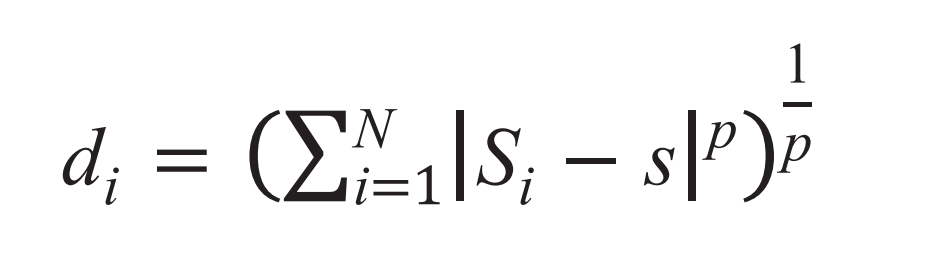

In this formula 
- S(i) is the fingerprint (vector containing all RSSI values) at point ith location in the map
- s is the RSSI vector found at the query point
- p in this equation can be changed from 1 to infinity. When p = 1, the formula calculates Manhattan Distance. When p = 2, then it calculates Euclidean Distance. And when p-> infinity, it gives the Chebyshev distance



So far, we have calculated the distance between the Query point and the Fingerprint points. Now we arrange these fingerprint coordinates in an ascending order. The first k value coordinates are selected as the nearest neighbours. We will now calculate the average of the x and y values according to the following formula to calculate the position of the Query Point. These coordinates are what has been predicted by the algorithm

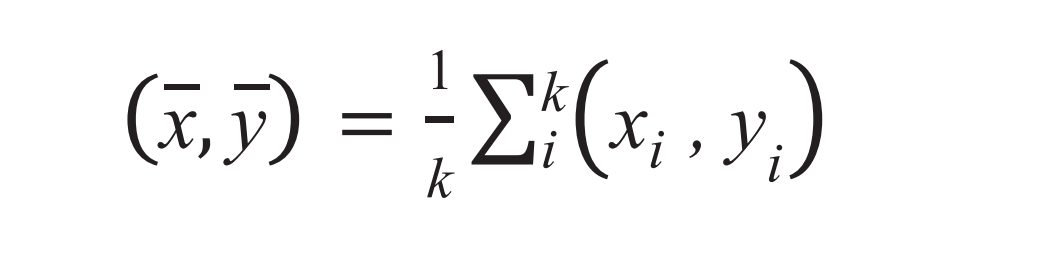

In [ ]:

#--------------------------------Initialization---------------------------------
#Create an object which stores the radio map data.
map_data = radio_map(14,4)
number_of_fps = 45      #define here the number of fingerprint points on the grid
number_of_aps = 5       #define the number of AP points on the grid
#-------------------------------------------------------------------------------








#-------------------------------Simulation Data--------------------------------
#Generating random fingerprint points and storing them in a pandas data frame
FPG_data  = pd.DataFrame()                
y = generateRandomFPs(number_of_fps, map_data)
FPG_data["Coordinates"] = y     


#Generating random access points and storing them in a pandas data frame called AP_data
AP_data = pd.DataFrame()
#x = generateRandomAPs(map_data, number_of_aps)
AP_data["Coordinates"] = generateRandomAPs(map_data, 5)

                          


#Generating a random Query Point and storing them in a pandas data frame called QP_data
QP_data = pd.DataFrame()
z  = generateRandomQP(map_data)
z = [z]
QP_data["Coordinates"] = z 


#----------------------------Variables for Calculations-------------------------
import math
n = 2                    # n calculation for the path loss model
p = 2                    # p is for the calculation of the minkowski distance
mp = -69                 # constant value in the path loss model equation
k = 5                    # k = 5 : algorithm searches for 5 nearest data points

#----------------------Calculation of the Minkowski Distance---------------------


#    1.1 Separating the coordinates into individual x and y components for all data points
FPG_data['X-Values'] = FPG_data.apply(lambda x : x['Coordinates'][0] , axis = 1)
FPG_data['Y-Values'] = FPG_data.apply(lambda x : x['Coordinates'][1] , axis = 1)

QP_data['X-Values'] = QP_data.apply(lambda x : x['Coordinates'][0] , axis = 1)
QP_data['Y-Values'] = QP_data.apply(lambda x : x['Coordinates'][1] , axis = 1)


name_list = []
for i in range(len(map_data.APs)):
  var_D = "D"+str(i+1)     # create a string "D(i+1)"
  #1.2 Calculate the distance from Query Points to all the points on the radio map. Store this in the D(i+1) column
  FPG_data[var_D] = FPG_data.apply(lambda x : math.sqrt(math.pow(x['X-Values']-map_data.APs[i][0], 2)+ math.pow(x['Y-Values']-map_data.APs[i][1], 2)), axis = 1) 
  QP_data[var_D] = QP_data.apply(lambda x : math.sqrt( math.pow(x['X-Values']-map_data.APs[i][0], 2)+ math.pow(x['Y-Values']-map_data.APs[i][1], 2)), axis = 1)
  y = "RSSI"+ str(i+1)


  #1.3 Generate fake RSSI fingerprints based on the distances and a random element of +-5
  FPG_data[y] = FPG_data.apply(lambda x : mp -10*n*math.log10(x[var_D])+random.randint(-5,5), axis = 1)
  QP_data[y] = QP_data.apply(lambda x : mp -10*n*math.log10(x[var_D])+random.randint(-5,5), axis = 1)


  #1.4 Calculate the differences in fingerprint vectors and the query vectors. Power it by the minkowski equation constant p
  temp = QP_data[y]
  FPG_data["S"+str(i+1)] = FPG_data.apply(lambda x : math.pow(math.fabs(x[y]-temp), p), axis = 1 )
  name_list.append("S"+str(i+1))

  #1.5 Calculate the sum of all differences 
later_SUM = []
for ind in FPG_data.index:
  sum = 0
  for i in name_list:
    sum+=FPG_data[i][ind]

  later_SUM.append(sum)

  #1.6 Create a new column in FPG data frame.
FPG_data["DistanceToQueryPoint"] = pd.DataFrame(later_SUM)

  # 1.7 Power the new column with the constant value p
FPG_data["DistanceToQueryPoint"] = FPG_data.apply(lambda x : x["DistanceToQueryPoint"]**(1/p),axis = 1)
FPG_data["RealDistance"] = FPG_data.apply(lambda x : math.sqrt(math.pow(x['X-Values']-map_data.QP[0],2) + math.pow(x['Y-Values']-map_data.QP[1],2)), axis = 1)


  #1.8 Sort the data points in ascending order. 
copy_FPG = FPG_data.sort_values(by=['RealDistance'])
FPG_data = FPG_data.sort_values(by=['DistanceToQueryPoint'])




#1.9 Find the mean of the x and y components of the first k data points in the FPG_data

x_coor = 0
y_coor = 0
counter = 0
for ind in FPG_data.index:
  if(counter==k):
    break
  x_coor+=FPG_data['X-Values'][ind].tolist()
  y_coor+=FPG_data['Y-Values'][ind].tolist()  
  map_data.predictedNearestNeighbours.append([FPG_data['X-Values'][ind].tolist(), FPG_data['Y-Values'][ind].tolist()])
  counter+=1


x_predicted = x_coor/k
y_predicted = y_coor/k

#1.10 Update the radio map with the values
map_data.setPredicted([int(x_predicted), int(y_predicted)])


counter2 = 0
for ind in copy_FPG.index:
  if(counter2==k):
    break
  counter2+=1
  map_data.actualNearestNeighbours.append([copy_FPG['X-Values'][ind].tolist(), copy_FPG['Y-Values'][ind].tolist()])












#1.11 Print the predicted results
print("Predicted Co-ordinate x : ", x_predicted)
print("Predicted Co-ordinate y : ", y_predicted)


#1.12 Print the actual coordinates of the queried fingerprint points
print("Actual Co-ordinate x : ", map_data.QP[0])
print("Actual Co-ordinate y : ", map_data.QP[1])


print("Predicted Neighbours : " , map_data.predictedNearestNeighbours)
print("Actual neighbours : ", map_data.actualNearestNeighbours)

#1.13 Display it on a heatmap
map_data.showVisualMap()

In [ ]:
map_data = radio_map(5,5)

In [ ]:
FPG_data

In [ ]:
def n_of_correct_neighbours(map_data):
  c = 0
  for i in map_data.actualNearestNeighbours:
    if(i in map_data.predictedNearestNeighbours):
      c+=1
  return c
def distance_error(map_data):
  xP = map_data.PP[0]
  yP = map_data.PP[1]

  xA = map_data.QP[0]
  yA = map_data.QP[1]


  return math.sqrt(math.pow(xA-xP,2) + math.pow(yA-yP,2))




In [ ]:

losl = {'trialNumber': [],
        'correctNeihbours': [],
        'differenceInDistance': []}

multi_tests_data = pd.DataFrame(losl)



for u in range(100):
  #--------------------------------Initialization---------------------------------
  #Create an object which stores the radio map data.
  map_data = radio_map(50,50)
  number_of_fps = 100      #define here the number of fingerprint points on the grid
  number_of_aps = 10       #define the number of AP points on the grid
  #-------------------------------------------------------------------------------








  #-------------------------------Simulation Data--------------------------------
  #Generating random fingerprint points and storing them in a pandas data frame
  FPG_data  = pd.DataFrame()                
  y = generateRandomFPs(number_of_fps, map_data)
  FPG_data["Coordinates"] = y     


  #Generating random access points and storing them in a pandas data frame called AP_data
  AP_data = pd.DataFrame()
  #x = generateRandomAPs(map_data, number_of_aps)
  AP_data["Coordinates"] = map_data.setAP([[0,0],[0, 9],[0, 19],
                            [0, 29],[0, 39], [0, 49],
                            [49,0],[49, 9],[49, 19],
                            [49, 29],[49, 39], [49, 49]])

                            


  #Generating a random Query Point and storing them in a pandas data frame called QP_data
  QP_data = pd.DataFrame()
  z  = generateRandomQP(map_data)
  z = [z]
  QP_data["Coordinates"] = z 


  #----------------------------Variables for Calculations-------------------------
  import math
  n = 2                    # n calculation for the path loss model
  p = 2                    # p is for the calculation of the minkowski distance
  mp = -69                 # constant value in the path loss model equation
  k = 5                    # k = 5 : algorithm searches for 5 nearest data points

  #----------------------Calculation of the Minkowski Distance---------------------


  #    1.1 Separating the coordinates into individual x and y components for all data points
  FPG_data['X-Values'] = FPG_data.apply(lambda x : x['Coordinates'][0] , axis = 1)
  FPG_data['Y-Values'] = FPG_data.apply(lambda x : x['Coordinates'][1] , axis = 1)

  QP_data['X-Values'] = QP_data.apply(lambda x : x['Coordinates'][0] , axis = 1)
  QP_data['Y-Values'] = QP_data.apply(lambda x : x['Coordinates'][1] , axis = 1)


  name_list = []
  for i in range(len(map_data.APs)):
    var_D = "D"+str(i+1)     # create a string "D(i+1)"
    #1.2 Calculate the distance from Query Points to all the points on the radio map. Store this in the D(i+1) column
    FPG_data[var_D] = FPG_data.apply(lambda x : math.sqrt(math.pow(x['X-Values']-map_data.APs[i][0], 2)+ math.pow(x['Y-Values']-map_data.APs[i][1], 2)), axis = 1) 
    QP_data[var_D] = QP_data.apply(lambda x : math.sqrt( math.pow(x['X-Values']-map_data.APs[i][0], 2)+ math.pow(x['Y-Values']-map_data.APs[i][1], 2)), axis = 1)
    y = "RSSI"+ str(i+1)


    #1.3 Generate fake RSSI fingerprints based on the distances and a random element of +-5
    FPG_data[y] = FPG_data.apply(lambda x : mp -10*n*math.log10(x[var_D])+random.randint(-5,5), axis = 1)
    QP_data[y] = QP_data.apply(lambda x : mp -10*n*math.log10(x[var_D])+random.randint(-5,5), axis = 1)


    #1.4 Calculate the differences in fingerprint vectors and the query vectors. Power it by the minkowski equation constant p
    temp = QP_data[y]
    FPG_data["S"+str(i+1)] = FPG_data.apply(lambda x : math.pow(math.fabs(x[y]-temp), p), axis = 1 )
    name_list.append("S"+str(i+1))

    #1.5 Calculate the sum of all differences 
  later_SUM = []
  for ind in FPG_data.index:
    sum = 0
    for i in name_list:
      sum+=FPG_data[i][ind]

    later_SUM.append(sum)

    #1.6 Create a new column in FPG data frame.
  FPG_data["DistanceToQueryPoint"] = pd.DataFrame(later_SUM)

    # 1.7 Power the new column with the constant value p
  FPG_data["DistanceToQueryPoint"] = FPG_data.apply(lambda x : x["DistanceToQueryPoint"]**(1/p),axis = 1)
  FPG_data["RealDistance"] = FPG_data.apply(lambda x : math.sqrt(math.pow(x['X-Values']-map_data.QP[0],2) + math.pow(x['Y-Values']-map_data.QP[1],2)), axis = 1)


    #1.8 Sort the data points in ascending order. 
  copy_FPG = FPG_data.sort_values(by=['RealDistance'])
  FPG_data = FPG_data.sort_values(by=['DistanceToQueryPoint'])




  #1.9 Find the mean of the x and y components of the first k data points in the FPG_data

  x_coor = 0
  y_coor = 0
  counter = 0
  for ind in FPG_data.index:
    counter+=1
    if(counter==k):
      break
    x_coor+=FPG_data['X-Values'][ind].tolist()
    y_coor+=FPG_data['Y-Values'][ind].tolist()  
    map_data.predictedNearestNeighbours.append([FPG_data['X-Values'][ind].tolist(), FPG_data['Y-Values'][ind].tolist()])

  x_predicted = x_coor/k
  y_predicted = y_coor/k

  #1.10 Update the radio map with the values
  map_data.setPredicted([int(x_predicted), int(y_predicted)])


  counter2 = 0
  for ind in copy_FPG.index:
    if(counter2==k):
      break
    counter2+=1
    map_data.actualNearestNeighbours.append([copy_FPG['X-Values'][ind].tolist(), copy_FPG['Y-Values'][ind].tolist()])




  alpha = n_of_correct_neighbours(map_data)
  beta = distance_error(map_data)

  new_row = {'correctNeighbours' : alpha, 'differenceInDistance' : beta}
  multi_tests_data = multi_tests_data.append(new_row, ignore_index = True)


In [ ]:
multi_tests_data

In [ ]:
multi_tests_data.describe()

In [ ]:
import seaborn as sb
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = multi_tests_data['differenceInDistance'], orient = "h", ax = axes[0])
sb.histplot(data = multi_tests_data['differenceInDistance'], ax = axes[1])

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = 'correctNeighbours', y = 'differenceInDistance', data = multi_tests_data)